<img src="img/pandas.png" alt="image" width="500" height="auto">

In [1]:
import pandas as pd
import numpy as np
import datetime 
import time
import matplotlib.pyplot as plt
from scipy.stats import norm
from matplotlib.offsetbox import (OffsetImage, AnnotationBbox)
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from pathlib import Path
pd.__version__

'2.2.2'

In [2]:
def get_metrics(sentence: str, repeat: int)-> list:
    init_total = time.time()
    res = []
    for _ in range(repeat):
        last_run = time.time()
        exec(sentence)
        res.append(time.time() - last_run)
    print('Tiempo de ejecución:', time.time() - init_total, 'segundos')
    return res

In [3]:
NUM_REP=20

### Cargar el dataset
"Este dataset de Spotify de todos los gráficos "Top 200" y "Viral 50" publicados globalmente. Spotify publica un nuevo gráfico cada 2 o 3 días. Esta es su colección completa desde el 1 de enero de 2019 que  contiene 29 columnas por cada fila que se relleno utilizando la API de Spotify".

https://www.kaggle.com/datasets/sunnykakar/spotify-charts-all-audio-data/

In [4]:
total_metrics = pd.DataFrame()
total_metrics["Load"] = get_metrics("df = pd.read_csv('dataset/spotify_min.csv',low_memory=False)",NUM_REP)
df = pd.read_csv('dataset/spotify_min.csv',low_memory=False)
df.head(3)

Tiempo de ejecución: 130.79966068267822 segundos


,Unnamed: 0.1,Unnamed: 0,title,rank,date,artist,url,region,chart,trend,...,af_key,af_loudness,af_mode,af_speechiness,af_acousticness,af_instrumentalness,af_liveness,af_valence,af_tempo,af_time_signature
0,0,0,Chantaje (feat. Maluma),1,2017-01-01,Shakira,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,Argentina,top200,SAME_POSITION,...,8.0,-2.921,0.0,0.0776,0.18700,0.000030,0.159,0.907,102.034,4.0
1,1,1,Vente Pa' Ca (feat. Maluma),2,2017-01-01,Ricky Martin,https://open.spotify.com/track/7DM4BPaS7uofFul...,Argentina,top200,MOVE_UP,...,11.0,-4.070,0.0,0.2260,0.00431,0.000017,0.101,0.533,99.935,4.0
2,2,2,Reggaetón Lento (Bailemos),3,2017-01-01,CNCO,https://open.spotify.com/track/3AEZUABDXNtecAO...,Argentina,top200,MOVE_DOWN,...,4.0,-3.073,0.0,0.0502,0.40000,0.000000,0.176,0.710,93.974,4.0


In [5]:
df.dtypes

Unnamed: 0.1             int64
Unnamed: 0               int64
title                   object
rank                     int64
date                    object
artist                  object
url                     object
region                  object
chart                   object
trend                   object
streams                float64
track_id                object
album                   object
popularity             float64
duration_ms            float64
explicit                object
release_date            object
available_markets       object
af_danceability        float64
af_energy              float64
af_key                 float64
af_loudness            float64
af_mode                float64
af_speechiness         float64
af_acousticness        float64
af_instrumentalness    float64
af_liveness            float64
af_valence             float64
af_tempo               float64
af_time_signature      float64
dtype: object

In [6]:
df.shape

(1000000, 30)

<img src="img/N.png">

<h2 style='color:#d2ff91;' align="center">Seleccionando<h2>

### Un subconjunto de columnas y filas

Pido 5 columnas aleatorias

In [7]:
rand_cols=df.columns.to_series().sample(n=5)
rand_cols

explicit                  explicit
af_mode                    af_mode
af_tempo                  af_tempo
af_loudness            af_loudness
af_acousticness    af_acousticness
dtype: object

In [8]:
total_metrics["Select"] = get_metrics("df.iloc[0:3][rand_cols]",NUM_REP)
df.iloc[0:3][rand_cols]

Tiempo de ejecución: 0.006496429443359375 segundos


,explicit,af_mode,af_tempo,af_loudness,af_acousticness
0,False,0.0,102.034,-2.921,0.18700
1,False,0.0,99.935,-4.070,0.00431
2,False,0.0,93.974,-3.073,0.40000


### Una celda específica 

In [9]:
total_metrics["Select_Cell"] = get_metrics("df.at[2,'af_instrumentalness']",NUM_REP)
df.at[2,'af_instrumentalness']

Tiempo de ejecución: 0.002566814422607422 segundos


0.0

<h2 style='color:#d2ff91;' align="center">Operationes sobre columnas<h3>

## Cambiando el tipo de una columna

In [10]:
total_metrics["Change Type"] = get_metrics("pd.to_datetime(df['date'], format='%Y-%m-%d')",NUM_REP)
df["date"] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df

Tiempo de ejecución: 0.9520020484924316 segundos


,Unnamed: 0.1,Unnamed: 0,title,rank,date,artist,url,region,chart,trend,...,af_key,af_loudness,af_mode,af_speechiness,af_acousticness,af_instrumentalness,af_liveness,af_valence,af_tempo,af_time_signature
0,0,0,Chantaje (feat. Maluma),1,2017-01-01,Shakira,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,Argentina,top200,SAME_POSITION,...,8.0,-2.921,0.0,0.0776,0.18700,0.000030,0.1590,0.907,102.034,4.0
1,1,1,Vente Pa' Ca (feat. Maluma),2,2017-01-01,Ricky Martin,https://open.spotify.com/track/7DM4BPaS7uofFul...,Argentina,top200,MOVE_UP,...,11.0,-4.070,0.0,0.2260,0.00431,0.000017,0.1010,0.533,99.935,4.0
2,2,2,Reggaetón Lento (Bailemos),3,2017-01-01,CNCO,https://open.spotify.com/track/3AEZUABDXNtecAO...,Argentina,top200,MOVE_DOWN,...,4.0,-3.073,0.0,0.0502,0.40000,0.000000,0.1760,0.710,93.974,4.0
3,3,3,Safari,4,2017-01-01,"J Balvin, Pharrell Williams, BIA, Sky",https://open.spotify.com/track/6rQSrBHf7HlZjtc...,Argentina,top200,SAME_POSITION,...,0.0,-4.361,1.0,0.3260,0.55100,0.000003,0.1260,0.555,180.044,4.0
4,4,4,Shaky Shaky,5,2017-01-01,Daddy Yankee,https://open.spotify.com/track/58IL315gMSTD37D...,Argentina,top200,MOVE_UP,...,6.0,-4.228,0.0,0.2920,0.07600,0.000000,0.0631,0.873,88.007,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999995,999995,Me Dediqué a Perderte,146,2018-02-13,Alejandro Fernández,https://open.spotify.com/track/4NUt1fcnO9aQAEL...,Mexico,top200,MOVE_DOWN,...,8.0,-9.115,1.0,0.0740,0.49100,0.000002,0.1020,0.465,148.010,4.0
999996,999996,999996,Something Just Like This,147,2018-02-13,"The Chainsmokers, Coldplay",https://open.spotify.com/track/6RUKPb4LETWmmr3...,Mexico,top200,MOVE_DOWN,...,11.0,-6.769,0.0,0.0317,0.04980,0.000014,0.1640,0.446,103.019,4.0
999997,999997,999997,Feel It Still,148,2018-02-13,Portugal. The Man,https://open.spotify.com/track/6QgjcU0zLnzq5Or...,Mexico,top200,MOVE_UP,...,1.0,-5.115,0.0,0.0504,0.04170,0.000113,0.0717,0.754,79.028,4.0
999998,999998,999998,Ahora Dice - Real Hasta La Muerte Remix,149,2018-02-13,"Chris Jedi, J Balvin, Ozuna, Cardi B, Offset, ...",https://open.spotify.com/track/1fs9kTASuC9RJ9s...,Mexico,top200,NEW_ENTRY,...,1.0,-5.735,1.0,0.2190,0.27000,0.000000,0.1160,0.602,143.920,4.0


## Concatenando una columna

In [11]:
total_metrics["Add_Col"] = get_metrics("df[\"w\"] = 1",NUM_REP)
df["w"]

Tiempo de ejecución: 0.03651833534240723 segundos


0         1
1         1
2         1
3         1
4         1
         ..
999995    1
999996    1
999997    1
999998    1
999999    1
Name: w, Length: 1000000, dtype: int64

## Sumando dos columnas

In [12]:
total_metrics["Add_Cols"] = get_metrics("df['w'] = df['w'] + df['rank']",NUM_REP)
df['w'] = df['w'] + df['rank']
df

Tiempo de ejecución: 0.06669497489929199 segundos


,Unnamed: 0.1,Unnamed: 0,title,rank,date,artist,url,region,chart,trend,...,af_loudness,af_mode,af_speechiness,af_acousticness,af_instrumentalness,af_liveness,af_valence,af_tempo,af_time_signature,w
0,0,0,Chantaje (feat. Maluma),1,2017-01-01,Shakira,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,Argentina,top200,SAME_POSITION,...,-2.921,0.0,0.0776,0.18700,0.000030,0.1590,0.907,102.034,4.0,22
1,1,1,Vente Pa' Ca (feat. Maluma),2,2017-01-01,Ricky Martin,https://open.spotify.com/track/7DM4BPaS7uofFul...,Argentina,top200,MOVE_UP,...,-4.070,0.0,0.2260,0.00431,0.000017,0.1010,0.533,99.935,4.0,43
2,2,2,Reggaetón Lento (Bailemos),3,2017-01-01,CNCO,https://open.spotify.com/track/3AEZUABDXNtecAO...,Argentina,top200,MOVE_DOWN,...,-3.073,0.0,0.0502,0.40000,0.000000,0.1760,0.710,93.974,4.0,64
3,3,3,Safari,4,2017-01-01,"J Balvin, Pharrell Williams, BIA, Sky",https://open.spotify.com/track/6rQSrBHf7HlZjtc...,Argentina,top200,SAME_POSITION,...,-4.361,1.0,0.3260,0.55100,0.000003,0.1260,0.555,180.044,4.0,85
4,4,4,Shaky Shaky,5,2017-01-01,Daddy Yankee,https://open.spotify.com/track/58IL315gMSTD37D...,Argentina,top200,MOVE_UP,...,-4.228,0.0,0.2920,0.07600,0.000000,0.0631,0.873,88.007,4.0,106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999995,999995,Me Dediqué a Perderte,146,2018-02-13,Alejandro Fernández,https://open.spotify.com/track/4NUt1fcnO9aQAEL...,Mexico,top200,MOVE_DOWN,...,-9.115,1.0,0.0740,0.49100,0.000002,0.1020,0.465,148.010,4.0,3067
999996,999996,999996,Something Just Like This,147,2018-02-13,"The Chainsmokers, Coldplay",https://open.spotify.com/track/6RUKPb4LETWmmr3...,Mexico,top200,MOVE_DOWN,...,-6.769,0.0,0.0317,0.04980,0.000014,0.1640,0.446,103.019,4.0,3088
999997,999997,999997,Feel It Still,148,2018-02-13,Portugal. The Man,https://open.spotify.com/track/6QgjcU0zLnzq5Or...,Mexico,top200,MOVE_UP,...,-5.115,0.0,0.0504,0.04170,0.000113,0.0717,0.754,79.028,4.0,3109
999998,999998,999998,Ahora Dice - Real Hasta La Muerte Remix,149,2018-02-13,"Chris Jedi, J Balvin, Ozuna, Cardi B, Offset, ...",https://open.spotify.com/track/1fs9kTASuC9RJ9s...,Mexico,top200,NEW_ENTRY,...,-5.735,1.0,0.2190,0.27000,0.000000,0.1160,0.602,143.920,4.0,3130


## Aplicando la potencia

In [13]:
total_metrics["Power"] = get_metrics("np.power(df['af_speechiness'] + df['af_acousticness'], 2)",NUM_REP)
np.power(df['af_speechiness'] + df['af_acousticness'], 2)

Tiempo de ejecución: 0.050943851470947266 segundos


0         0.070013
1         0.053043
2         0.202680
3         0.769129
4         0.135424
            ...   
999995    0.319225
999996    0.006642
999997    0.008482
999998    0.239121
999999    0.055272
Length: 1000000, dtype: float64

## Ordenando de acuerdo a una columna

In [14]:
total_metrics["Sort"] = get_metrics("df.sort_values('rank')",NUM_REP)
df.sort_values('rank')

Tiempo de ejecución: 3.526489496231079 segundos


,Unnamed: 0.1,Unnamed: 0,title,rank,date,artist,url,region,chart,trend,...,af_loudness,af_mode,af_speechiness,af_acousticness,af_instrumentalness,af_liveness,af_valence,af_tempo,af_time_signature,w
925288,925288,925288,One Kiss (with Dua Lipa),1,2018-05-07,Calvin Harris,https://open.spotify.com/track/7ef4DlsgrMEH11c...,Belgium,top200,SAME_POSITION,...,-3.240,0.0,0.1100,0.03700,0.000022,0.0814,0.5920,123.994,4.0,22
309741,309741,309741,Qué Maldición,1,2020-05-02,"Banda MS de Sergio Lizárraga, Snoop Dogg",https://open.spotify.com/track/2RxC2peY3FtrurY...,El Salvador,top200,MOVE_UP,...,-8.051,0.0,0.1960,0.21300,0.000000,0.1300,0.6830,177.951,4.0,22
719592,719592,719592,God's Plan,1,2018-03-08,Drake,https://open.spotify.com/track/2XW4DbS6NddZxRP...,France,top200,SAME_POSITION,...,-9.441,1.0,0.1030,0.03090,0.000087,0.5580,0.3730,77.176,4.0,22
467482,467482,467482,夜に駆ける,1,2020-06-03,YOASOBI,https://open.spotify.com/track/3dPtXHP0oXQ4HCW...,Japan,top200,SAME_POSITION,...,-5.221,1.0,0.0305,0.00231,0.000017,0.3000,0.7890,130.041,4.0,22
102449,102449,102449,Despacito (Featuring Daddy Yankee),1,2017-02-03,Luis Fonsi,https://open.spotify.com/track/4aWmUDTfIPGksMN...,Panama,top200,SAME_POSITION,...,-4.757,1.0,0.1700,0.20900,0.000000,0.1120,0.8460,177.833,4.0,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717847,717847,717847,A Mí,200,2020-05-05,Rels B,https://open.spotify.com/track/7MmrcXVA7A5zZ2C...,Peru,top200,MOVE_DOWN,...,-6.397,1.0,0.2560,0.24100,0.071300,0.0419,0.5160,94.925,4.0,4201
185795,185795,185795,Sugar (feat. Francesco Yates),200,2017-02-05,Robin Schulz,https://open.spotify.com/track/5tf1VVWniHgryyu...,Austria,top200,MOVE_DOWN,...,-5.098,0.0,0.0581,0.01850,0.000000,0.1630,0.6360,123.063,4.0,4201
419254,419254,419254,CAN'T SAY,200,2020-05-03,Travis Scott,https://open.spotify.com/track/27a1mYSG5tYg7dm...,Romania,top200,NEW_ENTRY,...,-5.366,0.0,0.0547,0.20100,0.000000,0.1180,0.7130,147.980,4.0,4201
575535,575535,575535,Dusk Till Dawn - Radio Edit,200,2018-04-02,"ZAYN, Sia",https://open.spotify.com/track/1j4kHkkpqZRBwE0...,Argentina,top200,NEW_ENTRY,...,-6.589,0.0,0.0386,0.10200,0.000001,0.1060,0.0951,180.042,4.0,4201


<h2 style='color:#d2ff91;' align="center">Descripción general de un  Dataframe<h2>

## Describe

In [15]:
total_metrics["Describe"] = get_metrics("df.describe()",NUM_REP)
df.describe()

Tiempo de ejecución: 11.010272979736328 segundos


,Unnamed: 0.1,Unnamed: 0,rank,date,streams,popularity,duration_ms,af_danceability,af_energy,af_key,af_loudness,af_mode,af_speechiness,af_acousticness,af_instrumentalness,af_liveness,af_valence,af_tempo,af_time_signature,w
count,1000000.000000,1000000.000000,1000000.000000,1000000,8.328820e+05,999987.000000,9.999870e+05,999987.000000,999987.000000,999987.000000,999987.000000,999987.000000,999987.000000,999987.000000,999987.000000,999987.000000,999987.000000,999987.000000,999987.000000,1000000.000000
mean,499999.500000,499999.500000,83.403548,2018-02-27 02:04:23.577600,5.163659e+04,38.465935,2.165603e+05,0.678832,0.662008,5.330370,-5.988280,0.577042,0.102934,0.222782,0.011335,0.167671,0.511152,120.293050,3.979186,1752.474508
min,0.000000,0.000000,1.000000,2017-01-01 00:00:00,1.001000e+03,0.000000,0.000000e+00,0.064500,0.006110,0.000000,-50.398000,0.000000,0.022000,0.000003,0.000000,0.017000,0.002550,31.262000,1.000000,22.000000
25%,249999.750000,249999.750000,32.000000,2017-02-13 00:00:00,3.345000e+03,0.000000,1.911390e+05,0.600000,0.555000,2.000000,-7.123000,0.000000,0.043200,0.043900,0.000000,0.093200,0.339000,97.028000,4.000000,673.000000
50%,499999.500000,499999.500000,73.000000,2018-02-05 00:00:00,9.105000e+03,46.000000,2.116700e+05,0.696000,0.680000,6.000000,-5.674000,1.000000,0.064900,0.141000,0.000000,0.122000,0.506000,116.073000,4.000000,1534.000000
75%,749999.250000,749999.250000,133.000000,2018-04-07 00:00:00,3.059000e+04,69.000000,2.354770e+05,0.773000,0.787000,8.000000,-4.393000,1.000000,0.126000,0.330000,0.000021,0.191000,0.690000,138.292000,4.000000,2794.000000
max,999999.000000,999999.000000,200.000000,2021-10-15 00:00:00,7.985803e+06,90.000000,9.318296e+06,0.983000,0.999000,11.000000,1.509000,1.000000,0.961000,0.995000,0.987000,0.993000,0.989000,229.921000,5.000000,4201.000000
std,288675.278932,288675.278932,58.849084,NaN,2.001942e+05,32.855608,6.081035e+04,0.133360,0.163482,3.672533,2.298675,0.494029,0.092364,0.231255,0.079424,0.124262,0.222644,28.910258,0.226070,1235.830762


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 31 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   Unnamed: 0.1         1000000 non-null  int64         
 1   Unnamed: 0           1000000 non-null  int64         
 2   title                1000000 non-null  object        
 3   rank                 1000000 non-null  int64         
 4   date                 1000000 non-null  datetime64[ns]
 5   artist               1000000 non-null  object        
 6   url                  1000000 non-null  object        
 7   region               1000000 non-null  object        
 8   chart                1000000 non-null  object        
 9   trend                1000000 non-null  object        
 10  streams              832882 non-null   float64       
 11  track_id             999987 non-null   object        
 12  album                999700 non-null   object        
 13

<img src="img/Y.png">

## Group by

In [17]:
total_metrics["GroupBy"] = get_metrics("df.groupby('region')['rank'].agg('mean')",NUM_REP)
df.groupby('region')['rank'].agg('mean')

Tiempo de ejecución: 0.681272029876709 segundos


region
Andorra                 25.398253
Argentina               89.419842
Australia               89.382114
Austria                 89.330376
Belgium                 89.400881
                          ...    
United Arab Emirates    58.830976
United Kingdom          88.575337
United States           88.285662
Uruguay                 84.566763
Vietnam                 88.282619
Name: rank, Length: 67, dtype: float64

Supongamos que queremos agrupar todas las canciones por artistas, y dentro de cada artista queremos realizar las siguientes operaciones:
- Calcular los flujos totales.
- Obtener el promedio de la popularidad.
- Contar el número único de track_id.
- Calcular la suma de duración_ms


In [18]:
df.groupby("artist").agg(
    total_streams=pd.NamedAgg(column="streams", aggfunc="sum"),
    average_popularity=pd.NamedAgg(column="popularity", aggfunc="mean"),
    unique_tracks=pd.NamedAgg(column="track_id", aggfunc=pd.Series.nunique),
    total_duration=pd.NamedAgg(column="duration_ms", aggfunc="sum")
).reset_index()

,artist,total_streams,average_popularity,unique_tracks,total_duration
0,!!!,0.0,0.000000,1,936652.0
1,"!!!, Lea Lea",0.0,0.000000,1,234163.0
2,"#JPTH, Juha Pekka Tapani Heikkinen JA NIIN EDE...",0.0,0.000000,1,627000.0
3,#TocoParaVos,1004555.0,36.119792,11,32203930.0
4,$hirak,1948790.0,36.968750,2,6064514.0
...,...,...,...,...,...
13334,黃小琥,5377.0,0.000000,1,613466.0
13335,黃立行,2926.0,29.000000,1,245333.0
13336,黄靖伦,4471.0,4.000000,1,603786.0
13337,龔詩嘉,0.0,18.000000,1,920600.0


## Datos faltantes

In [19]:
df.isnull().values.any()

True

In [20]:
df.columns[df.isna().any()].tolist()

['streams',
 'track_id',
 'album',
 'popularity',
 'duration_ms',
 'explicit',
 'release_date',
 'available_markets',
 'af_danceability',
 'af_energy',
 'af_key',
 'af_loudness',
 'af_mode',
 'af_speechiness',
 'af_acousticness',
 'af_instrumentalness',
 'af_liveness',
 'af_valence',
 'af_tempo',
 'af_time_signature']

In [21]:
total_metrics["FillNaN"] = get_metrics("df['af_instrumentalness'].fillna(0)",NUM_REP)
df['af_instrumentalness'].fillna(0)

Tiempo de ejecución: 0.05923104286193848 segundos


0         0.000030
1         0.000017
2         0.000000
3         0.000003
4         0.000000
            ...   
999995    0.000002
999996    0.000014
999997    0.000113
999998    0.000000
999999    0.000000
Name: af_instrumentalness, Length: 1000000, dtype: float64

## Buscando duplicados

In [22]:
total_metrics["DUPL"] = get_metrics("df.duplicated()", NUM_REP)

Tiempo de ejecución: 15.556447744369507 segundos


## Calculando la matriz de correlación

In [23]:
df[['af_danceability','af_energy','af_key','af_loudness','af_mode','af_speechiness','af_acousticness','af_instrumentalness','af_liveness','af_valence','af_tempo','af_time_signature']].corr()

,af_danceability,af_energy,af_key,af_loudness,af_mode,af_speechiness,af_acousticness,af_instrumentalness,af_liveness,af_valence,af_tempo,af_time_signature
af_danceability,1.000000,0.105572,-0.015537,0.144974,-0.093909,0.155674,-0.164772,-0.057742,-0.028654,0.385865,-0.159504,0.098096
af_energy,0.105572,1.000000,-0.004927,0.726027,-0.080365,0.020110,-0.543161,-0.044550,0.123136,0.374097,0.057901,0.126547
af_key,-0.015537,-0.004927,1.000000,-0.036056,-0.142778,0.052981,-0.002208,-0.018269,-0.013005,0.024593,0.006936,-0.003691
af_loudness,0.144974,0.726027,-0.036056,1.000000,-0.036283,-0.080218,-0.404018,-0.173348,0.060556,0.310972,0.019241,0.076625
af_mode,-0.093909,-0.080365,-0.142778,-0.036283,1.000000,-0.082904,0.073240,0.004485,-0.018529,-0.073904,0.032478,-0.028083
af_speechiness,0.155674,0.020110,0.052981,-0.080218,-0.082904,1.000000,-0.027644,-0.057135,0.034989,0.061724,0.156125,0.081672
af_acousticness,-0.164772,-0.543161,-0.002208,-0.404018,0.073240,-0.027644,1.000000,0.070242,-0.065475,-0.100499,-0.066670,-0.110649
af_instrumentalness,-0.057742,-0.044550,-0.018269,-0.173348,0.004485,-0.057135,0.070242,1.000000,0.011364,-0.095358,0.008332,-0.029179
af_liveness,-0.028654,0.123136,-0.013005,0.060556,-0.018529,0.034989,-0.065475,0.011364,1.000000,0.030387,0.005429,0.013763
af_valence,0.385865,0.374097,0.024593,0.310972,-0.073904,0.061724,-0.100499,-0.095358,0.030387,1.000000,-0.031098,0.080445


<img src="img/Y.png">

## Ejecutando una consulta SQL

In [24]:
import pandasql as psql
total_metrics["SQL"] = get_metrics("psql.sqldf(\"SELECT title, artist FROM df WHERE region = 'Argentina' \", env=None)",NUM_REP)
psql.sqldf("SELECT title, artist FROM df WHERE region = 'Argentina' ", env=None)

Tiempo de ejecución: 397.4399688243866 segundos


,title,artist
0,Chantaje (feat. Maluma),Shakira
1,Vente Pa' Ca (feat. Maluma),Ricky Martin
2,Reggaetón Lento (Bailemos),CNCO
3,Safari,"J Balvin, Pharrell Williams, BIA, Sky"
4,Shaky Shaky,Daddy Yankee
...,...,...
20648,El Desorden,"Ozuna, Daddy Yankee, Plan B"
20649,Seguir Viviendo Sin Tu Amor,Luis Alberto Spinetta
20650,Nada De Nada (feat. Klave),Coscu
20651,Rocanroles Sin Destino,Callejeros


## Guardando como parquet

In [25]:
total_metrics["Write"] = get_metrics("df.to_parquet('dfpandas')",NUM_REP)
df.to_parquet('dfpandas.parquet')

Tiempo de ejecución: 34.74868059158325 segundos


In [26]:
Path('dfpandas.parquet').stat().st_size

52744812

<h1 style='color:#d2ff91;' align="center">Graficando los resultados<h1>

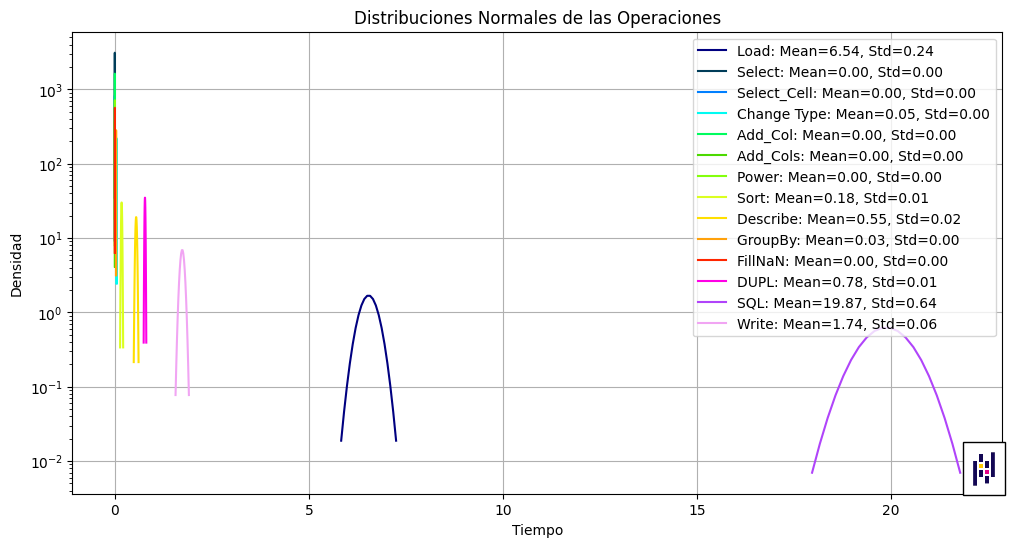

In [27]:
means = total_metrics.mean()
stds = total_metrics.std()
plt.figure(figsize=(12, 6))
ax= plt.subplot(111)
colormap = cm.gist_ncar
normalize = mcolors.Normalize(vmin=0, vmax=len(means))

for i,col in enumerate(total_metrics.columns):
    mean = means[col]
    std = stds[col]
    x = np.linspace(mean - 3*std, mean + 3*std, NUM_REP)
    plt.plot(x, norm.pdf(x, mean, std), label=f'{col}: Mean={mean:.2f}, Std={std:.2f}',color = colormap(normalize(i)))

img = plt.imread("img/pd.png")
im = OffsetImage(img, zoom=.05)
ab = AnnotationBbox(im, (1, 0), xycoords='axes fraction', box_alignment=(1.1,-0.1))
ax.add_artist(ab)
plt.legend(loc='upper right')
plt.title('Distribuciones Normales de las Operaciones')
plt.xlabel('Tiempo')
plt.ylabel('Densidad')
plt.yscale('log')

plt.grid(True)
plt.show()

### Eliminando las 6 operaciones que consumen más tiempo

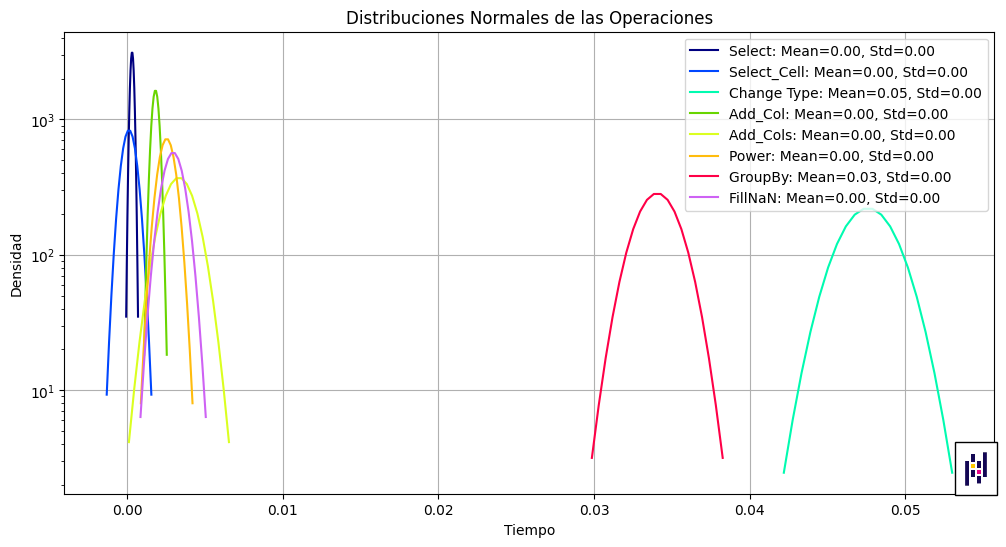

In [28]:
total_metrics= total_metrics.drop(["DUPL","SQL","Load","Write","Describe","Sort"], axis=1)
means = total_metrics.mean()
stds = total_metrics.std()
plt.figure(figsize=(12, 6))
ax= plt.subplot(111)
colormap = cm.gist_ncar
normalize = mcolors.Normalize(vmin=0, vmax=len(means))

for i,col in enumerate(total_metrics.columns):
    mean = means[col]
    std = stds[col]
    x = np.linspace(mean - 3*std, mean + 3*std, NUM_REP)
    plt.plot(x, norm.pdf(x, mean, std), label=f'{col}: Mean={mean:.2f}, Std={std:.2f}',color = colormap(normalize(i)))

img = plt.imread("img/pd.png")
im = OffsetImage(img, zoom=.05)
ab = AnnotationBbox(im, (1, 0), xycoords='axes fraction', box_alignment=(1.1,-0.1))
ax.add_artist(ab)
plt.legend()
plt.title('Distribuciones Normales de las Operaciones')
plt.xlabel('Tiempo')
plt.ylabel('Densidad')
plt.yscale('log')

plt.grid(True)
plt.show()

Ventajas de pandas en la docu de Nvidia: https://www.nvidia.com/en-us/glossary/data-science/pandas-python/
